In [1]:
# If running in Google Colab, mount drive
print('Check if running in Colab...')
try:
    from google.colab import drive
    print('Running in Colab!')
    drive.mount('/content/drive')
    %cd '/content/drive/My Drive/CIL-FS20'
except ImportError:
    print('Running locally!')

    #Check python version
    from platform import python_version
    print('Current python version: {}'.format(python_version()))

    # Check available GPUs
    import tensorflow as tf
    no_GPUs_available = len(tf.config.experimental.list_physical_devices('GPU'))
    print("Number of GPUs Available: {}".format(no_GPUs_available))

Check if running in Colab...
Running locally!
Current python version: 3.7.5
Number of GPUs Available: 1


In [2]:
import matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os,sys

from keras.models import Model, load_model
from keras.layers import Input
from keras.layers.core import Dropout, Lambda
from keras.layers.convolutional import Conv2D, Conv2DTranspose, UpSampling2D, Cropping2D
from keras.layers.pooling import MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator
from keras.layers.merge import concatenate
from keras import optimizers
from keras.layers import BatchNormalization
from tensorflow.keras.metrics import MeanIoU
from keras import backend as K
from keras.backend import binary_crossentropy
import keras
import random
from sklearn.model_selection import train_test_split

from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau, CSVLogger
from datetime import datetime

from mask_to_submission import masks_to_submission
import util

## Install the following packages
import imageio
from PIL import Image
import cv2
import natsort

Using TensorFlow backend.


## Constants

In [3]:
# Name of the current model
MODEL_NAME = 'fullyCNN_datagenerator'
IMG_WIDTH = 608
IMG_HEIGHT = 608
EPOCHS = 100
STEPS_PER_EPOCH = 500
LEARNING_RATE = 0.0001
BATCH_SIZE = 2
rnd_seed = 4
np.random.seed(rnd_seed)

## Load Images

In [4]:
training_image_dir = "training_images/images/"
training_label_dir = "training_images/groundtruth/"
test_image_dir = "test_images/"

files_image = os.listdir(training_image_dir)
files_image = natsort.natsorted(files_image)
files_label = os.listdir(training_label_dir)
files_label = natsort.natsorted(files_label)
files_test = os.listdir(test_image_dir)
files_test = natsort.natsorted(files_test)
n = len(files_image)
n_test = len(files_test) 

# Load list of numpy arrays of training images and labels
print("Loading " + str(n) + " training images")
training_image_list = []
training_label_list = []
for i in range(n):
    print("Loading training image {:04d}\r".format(i)),
    training_image_list.append(imageio.imread(training_image_dir + files_image[i], pilmode="RGB"))
    training_label_list.append(imageio.imread(training_label_dir + files_label[i], pilmode="L"))

# Load list of numpy arrays of test images
print("Loading " + str(n_test) + " test images")
test_image_list = [imageio.imread(test_image_dir + files_test[i]) for i in range(n_test)]

print("TRAINING:")
print(training_image_list[0].shape)
print(training_label_list[0].shape)
print("TEST:")
print(test_image_list[0].shape)

Loading 2511 training images
Loading training image 0000
Loading training image 0001
Loading training image 0002
Loading training image 0003
Loading training image 0004
Loading training image 0005
Loading training image 0006
Loading training image 0007
Loading training image 0008
Loading training image 0009
Loading training image 0010
Loading training image 0011
Loading training image 0012
Loading training image 0013
Loading training image 0014
Loading training image 0015
Loading training image 0016
Loading training image 0017
Loading training image 0018
Loading training image 0019
Loading training image 0020
Loading training image 0021
Loading training image 0022
Loading training image 0023
Loading training image 0024
Loading training image 0025
Loading training image 0026
Loading training image 0027
Loading training image 0028
Loading training image 0029
Loading training image 0030
Loading training image 0031
Loading training image 0032
Loading training image 0033
Loading training im

Loading training image 0308
Loading training image 0309
Loading training image 0310
Loading training image 0311
Loading training image 0312
Loading training image 0313
Loading training image 0314
Loading training image 0315
Loading training image 0316
Loading training image 0317
Loading training image 0318
Loading training image 0319
Loading training image 0320
Loading training image 0321
Loading training image 0322
Loading training image 0323
Loading training image 0324
Loading training image 0325
Loading training image 0326
Loading training image 0327
Loading training image 0328
Loading training image 0329
Loading training image 0330
Loading training image 0331
Loading training image 0332
Loading training image 0333
Loading training image 0334
Loading training image 0335
Loading training image 0336
Loading training image 0337
Loading training image 0338
Loading training image 0339
Loading training image 0340
Loading training image 0341
Loading training image 0342
Loading training ima

Loading training image 0624
Loading training image 0625
Loading training image 0626
Loading training image 0627
Loading training image 0628
Loading training image 0629
Loading training image 0630
Loading training image 0631
Loading training image 0632
Loading training image 0633
Loading training image 0634
Loading training image 0635
Loading training image 0636
Loading training image 0637
Loading training image 0638
Loading training image 0639
Loading training image 0640
Loading training image 0641
Loading training image 0642
Loading training image 0643
Loading training image 0644
Loading training image 0645
Loading training image 0646
Loading training image 0647
Loading training image 0648
Loading training image 0649
Loading training image 0650
Loading training image 0651
Loading training image 0652
Loading training image 0653
Loading training image 0654
Loading training image 0655
Loading training image 0656
Loading training image 0657
Loading training image 0658
Loading training ima

Loading training image 0925
Loading training image 0926
Loading training image 0927
Loading training image 0928
Loading training image 0929
Loading training image 0930
Loading training image 0931
Loading training image 0932
Loading training image 0933
Loading training image 0934
Loading training image 0935
Loading training image 0936
Loading training image 0937
Loading training image 0938
Loading training image 0939
Loading training image 0940
Loading training image 0941
Loading training image 0942
Loading training image 0943
Loading training image 0944
Loading training image 0945
Loading training image 0946
Loading training image 0947
Loading training image 0948
Loading training image 0949
Loading training image 0950
Loading training image 0951
Loading training image 0952
Loading training image 0953
Loading training image 0954
Loading training image 0955
Loading training image 0956
Loading training image 0957
Loading training image 0958
Loading training image 0959
Loading training ima

Loading training image 1230
Loading training image 1231
Loading training image 1232
Loading training image 1233
Loading training image 1234
Loading training image 1235
Loading training image 1236
Loading training image 1237
Loading training image 1238
Loading training image 1239
Loading training image 1240
Loading training image 1241
Loading training image 1242
Loading training image 1243
Loading training image 1244
Loading training image 1245
Loading training image 1246
Loading training image 1247
Loading training image 1248
Loading training image 1249
Loading training image 1250
Loading training image 1251
Loading training image 1252
Loading training image 1253
Loading training image 1254
Loading training image 1255
Loading training image 1256
Loading training image 1257
Loading training image 1258
Loading training image 1259
Loading training image 1260
Loading training image 1261
Loading training image 1262
Loading training image 1263
Loading training image 1264
Loading training ima

Loading training image 1538
Loading training image 1539
Loading training image 1540
Loading training image 1541
Loading training image 1542
Loading training image 1543
Loading training image 1544
Loading training image 1545
Loading training image 1546
Loading training image 1547
Loading training image 1548
Loading training image 1549
Loading training image 1550
Loading training image 1551
Loading training image 1552
Loading training image 1553
Loading training image 1554
Loading training image 1555
Loading training image 1556
Loading training image 1557
Loading training image 1558
Loading training image 1559
Loading training image 1560
Loading training image 1561
Loading training image 1562
Loading training image 1563
Loading training image 1564
Loading training image 1565
Loading training image 1566
Loading training image 1567
Loading training image 1568
Loading training image 1569
Loading training image 1570
Loading training image 1571
Loading training image 1572
Loading training ima

Loading training image 1837
Loading training image 1838
Loading training image 1839
Loading training image 1840
Loading training image 1841
Loading training image 1842
Loading training image 1843
Loading training image 1844
Loading training image 1845
Loading training image 1846
Loading training image 1847
Loading training image 1848
Loading training image 1849
Loading training image 1850
Loading training image 1851
Loading training image 1852
Loading training image 1853
Loading training image 1854
Loading training image 1855
Loading training image 1856
Loading training image 1857
Loading training image 1858
Loading training image 1859
Loading training image 1860
Loading training image 1861
Loading training image 1862
Loading training image 1863
Loading training image 1864
Loading training image 1865
Loading training image 1866
Loading training image 1867
Loading training image 1868
Loading training image 1869
Loading training image 1870
Loading training image 1871
Loading training ima

Loading training image 2139
Loading training image 2140
Loading training image 2141
Loading training image 2142
Loading training image 2143
Loading training image 2144
Loading training image 2145
Loading training image 2146
Loading training image 2147
Loading training image 2148
Loading training image 2149
Loading training image 2150
Loading training image 2151
Loading training image 2152
Loading training image 2153
Loading training image 2154
Loading training image 2155
Loading training image 2156
Loading training image 2157
Loading training image 2158
Loading training image 2159
Loading training image 2160
Loading training image 2161
Loading training image 2162
Loading training image 2163
Loading training image 2164
Loading training image 2165
Loading training image 2166
Loading training image 2167
Loading training image 2168
Loading training image 2169
Loading training image 2170
Loading training image 2171
Loading training image 2172
Loading training image 2173
Loading training ima

Loading training image 2441
Loading training image 2442
Loading training image 2443
Loading training image 2444
Loading training image 2445
Loading training image 2446
Loading training image 2447
Loading training image 2448
Loading training image 2449
Loading training image 2450
Loading training image 2451
Loading training image 2452
Loading training image 2453
Loading training image 2454
Loading training image 2455
Loading training image 2456
Loading training image 2457
Loading training image 2458
Loading training image 2459
Loading training image 2460
Loading training image 2461
Loading training image 2462
Loading training image 2463
Loading training image 2464
Loading training image 2465
Loading training image 2466
Loading training image 2467
Loading training image 2468
Loading training image 2469
Loading training image 2470
Loading training image 2471
Loading training image 2472
Loading training image 2473
Loading training image 2474
Loading training image 2475
Loading training ima

## Padd Images
Training images have size 400x400 and test images have size 608x608. So we need to pad training images to same size, 
for that I use mirror padding for now.

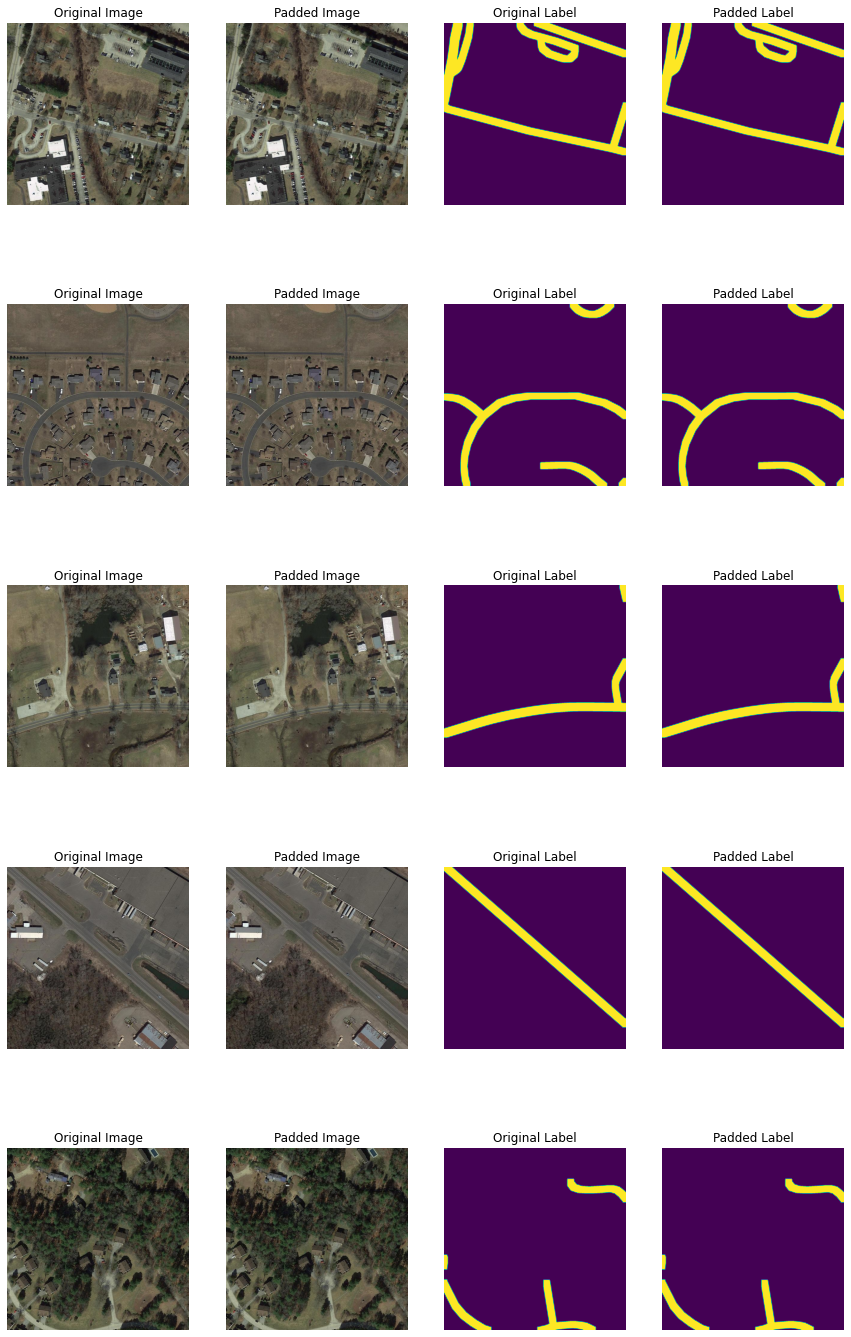

(2511, 608, 608, 3)
(2511, 608, 608, 1)


In [5]:
# Mirror padd all training images to get same size as test images
training_image_padded_list = []
training_label_padded_list = []
for i in range(n):
    training_image = training_image_list[i]
    training_label = training_label_list[i]
    height, width, _ = training_image.shape
    pad_y = int((IMG_HEIGHT - height) / 2)
    pad_x = int((IMG_WIDTH - height) / 2)
    training_image_padded_list.append(cv2.copyMakeBorder(training_image,pad_y,pad_y,pad_x,pad_x,cv2.BORDER_REFLECT))
    training_label_padded_list.append(cv2.copyMakeBorder(training_label,pad_y,pad_y,pad_x,pad_x,cv2.BORDER_REFLECT))

# Plot random Sample of images
index = random.randint(0, n-1)
num_samples = 5

f = plt.figure(figsize = (15, 25))
for i in range(1, num_samples*4, 4):
  index = random.randint(0, n-1)

  f.add_subplot(num_samples, 4, i)
  plt.imshow(training_image_list[index])
  plt.title("Original Image")
  plt.axis('off')

  f.add_subplot(num_samples, 4, i+1)
  plt.imshow(training_image_padded_list[index])
  plt.title("Padded Image")
  plt.axis('off')

  f.add_subplot(num_samples, 4, i+2)
  plt.imshow(np.squeeze(training_label_list[index]))
  plt.title("Original Label")
  plt.axis('off')

  f.add_subplot(num_samples, 4, i+3)
  plt.imshow(np.squeeze(training_label_padded_list[index]))
  plt.title("Padded Label")
  plt.axis('off')

plt.show()

# Convert image lists to numpy arrays for further processing
training_image = np.array(training_image_padded_list)
training_label = np.expand_dims(np.array(training_label_padded_list), -1)
test_image = np.array(test_image_list)
print(training_image.shape)
print(training_label.shape)

In [6]:
# Make sure label masks only have values 1 or zero
#thresh_val = 0.5
#training_label = (training_label > thresh_val).astype(np.uint8)
training_label = training_label/255
training_label = training_label.astype(np.float32)
#print(np.unique(training_label, return_counts=True, axis=None))
print(training_label.dtype)

# Get a validation set
training_image, validation_image, training_label, validation_label = train_test_split(
    training_image, training_label, test_size=0.1, random_state=rnd_seed)

# Rescale also validation images/labels and test images
validation_image = validation_image/255.0
validation_image = validation_image.astype(np.float32)
print(validation_image.dtype)
test_image = test_image/255.0
test_image = test_image.astype(np.float32)
print(test_image.dtype)

float32
float32
float32


## Augment Training Data

We use the Keras Data Generator to augment our training data online while training. This is necessary because of memory consumption.

In [7]:
# We create an instance for the training images, training labels and test images
data_gen_args = dict(rescale=1.0/255.0,
                     #rotation_range=360,
                     #width_shift_range=0.05,
                     #height_shift_range=0.05,
                     #zoom_range=0.05,
                     #shear_range=0.05,
                     horizontal_flip=True,
                     vertical_flip=True,
                     fill_mode='wrap')

image_datagen = ImageDataGenerator(**data_gen_args)
mask_datagen = ImageDataGenerator(**data_gen_args)

# Provide the same seed and keyword arguments to the fit and flow methods
seed = 1
image_generator = image_datagen.flow(
    training_image,
    batch_size=BATCH_SIZE,
    #save_to_dir="training_images_augmented/images/",
    #save_prefix="",
    #save_format="png",
    seed=seed)
mask_generator = mask_datagen.flow(
    training_label,
    batch_size=BATCH_SIZE,
    #save_to_dir="training_images_augmented/groundtruth/",
    #save_prefix="",
    #save_format="png",
    seed=seed)

# Combine generators into one which yields image and masks
train_generator = zip(image_generator, mask_generator)

## Loss Function and Accuracy Metric
- Accuracy: Intersection of prediction to label image over Union
- Loss :
    - Dice Coef Loss (https://arxiv.org/pdf/1606.04797v1.pdf)
    - Soft Dice Loss (Measure of interleaving of prediction image and label image)
    - Jaccard Distance

Source: https://towardsdatascience.com/metrics-to-evaluate-your-semantic-segmentation-model-6bcb99

In [8]:
from keras import backend as K

def iou_coef(y_true, y_pred, smooth=1):
    intersection = K.sum(K.abs(y_true * y_pred), axis=[1,2,3])
    union = K.sum(y_true,[1,2,3])+K.sum(y_pred,[1,2,3])-intersection
    iou = K.mean((intersection + smooth) / (union + smooth), axis=0)
    return iou

def dice_coef(y_true, y_pred, smooth=1):
    """
    Dice = (2*|X & Y|)/ (|X|+ |Y|)
         =  2*sum(|A*B|)/(sum(A^2)+sum(B^2))
    ref: https://arxiv.org/pdf/1606.04797v1.pdf
    """
    intersection = K.sum(K.abs(y_true * y_pred), axis=-1)
    return (2. * intersection + smooth) / (K.sum(K.square(y_true),-1) + K.sum(K.square(y_pred),-1) + smooth)

def dice_coef_loss(y_true, y_pred):
    return 1-dice_coef(y_true, y_pred)

def soft_dice_coef(y_true, y_pred, smooth = 1):
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = K.sum(y_true_f * y_pred_f)
    return (2. * intersection + smooth) / (K.sum(y_true_f) + K.sum(y_pred_f) + smooth)

def soft_dice_loss(y_true, y_pred):
    return 1-soft_dice_coef(y_true, y_pred)

def jaccard_distance(y_true, y_pred, smooth=100):
    intersection = K.sum(K.abs(y_true * y_pred), axis=-1)
    sum_ = K.sum(K.abs(y_true) + K.abs(y_pred), axis=-1)
    jac = (intersection + smooth) / (sum_ - intersection + smooth)
    return (1 - jac) * smooth

def jaccard_coef(y_true, y_pred, smooth = 1e-12):
    intersection = K.sum(y_true * y_pred, axis=[0, 1, 2])
    sum_ = K.sum(y_true + y_pred, axis=[0, 1, 2])

    jac = (intersection + smooth) / (sum_ - intersection + smooth)

    return K.mean(jac)

def jaccard_coef_int(y_true, y_pred):
    y_pred_pos = K.round(K.clip(y_pred, 0, 1))

    intersection = K.sum(y_true * y_pred_pos, axis=[0, -1, -2])
    sum_ = K.sum(y_true + y_pred_pos, axis=[0, -1, -2])

    jac = (intersection + smooth) / (sum_ - intersection + smooth)

    return K.mean(jac)

def combined_loss(y_true, y_pred):
    return -K.log(jaccard_coef(y_true, y_pred)) + binary_crossentropy(y_pred, y_true)

## Model: Fully CNN built in Keras

In [9]:
inputs = Input((IMG_HEIGHT, IMG_WIDTH, 3))

conv1 = Conv2D(16, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (inputs)
conv1 = BatchNormalization() (conv1)
conv1 = Dropout(0.1) (conv1)
conv1 = Conv2D(16, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (conv1)
conv1 = BatchNormalization() (conv1)
pooling1 = MaxPooling2D((2, 2)) (conv1)

conv2 = Conv2D(32, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (pooling1)
conv2 = BatchNormalization() (conv2)
conv2 = Dropout(0.1) (conv2)
conv2 = Conv2D(32, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (conv2)
conv2 = BatchNormalization() (conv2)
pooling2 = MaxPooling2D((2, 2)) (conv2)

conv3 = Conv2D(64, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (pooling2)
conv3 = BatchNormalization() (conv3)
conv3 = Dropout(0.2) (conv3)
conv3 = Conv2D(64, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (conv3)
conv3 = BatchNormalization() (conv3)
pooling3 = MaxPooling2D((2, 2)) (conv3)

conv4 = Conv2D(128, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (pooling3)
conv4 = BatchNormalization() (conv4)
conv4 = Dropout(0.2) (conv4)
conv4 = Conv2D(128, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (conv4)
conv4 = BatchNormalization() (conv4)
pooling4 = MaxPooling2D(pool_size=(2, 2)) (conv4)

conv5 = Conv2D(256, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (pooling4)
conv5 = BatchNormalization() (conv5)
conv5 = Dropout(0.3) (conv5)
conv5 = Conv2D(256, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (conv5)
conv5 = BatchNormalization() (conv5)


upsample6 = Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same') (conv5)
upsample6 = concatenate([upsample6, conv4])
conv6 = Conv2D(128, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (upsample6)
conv6 = BatchNormalization() (conv6)
conv6 = Dropout(0.2) (conv6)
conv6 = Conv2D(128, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (conv6)
conv6 = BatchNormalization() (conv6)

upsample7 = Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same') (conv6)
upsample7 = concatenate([upsample7, conv3])
conv7 = Conv2D(64, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (upsample7)
conv7 = BatchNormalization() (conv7)
conv7 = Dropout(0.2) (conv7)
conv7 = Conv2D(64, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (conv7)
conv7 = BatchNormalization() (conv7)

upsample8 = Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same') (conv7)
upsample8 = concatenate([upsample8, conv2])
conv8 = Conv2D(32, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (upsample8)
conv8 = BatchNormalization() (conv8)
conv8 = Dropout(0.1) (conv8)
conv8 = Conv2D(32, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (conv8)
conv8 = BatchNormalization() (conv8)

upsample9 = Conv2DTranspose(16, (2, 2), strides=(2, 2), padding='same') (conv8)
upsample9 = concatenate([upsample9, conv1], axis=3)
conv9 = Conv2D(16, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (upsample9)
conv9 = BatchNormalization() (conv9)
conv9 = Dropout(0.1) (conv9)
conv9 = Conv2D(16, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (conv9)
conv9 = BatchNormalization() (conv9)

outputs = Conv2D(1, (1, 1), activation='sigmoid') (conv9)

model = Model(inputs=[inputs], outputs=[outputs])
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 608, 608, 3)  0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 608, 608, 16) 448         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 608, 608, 16) 64          conv2d_1[0][0]                   
__________________________________________________________________________________________________
dropout_1 (Dropout)             (None, 608, 608, 16) 0           batch_normalization_1[0][0]      
____________________________________________________________________________________________

## Callbacks for Observations

In [10]:
#tbc=TensorBoardColab()
model_path = "./Models/{}_model.h5".format(MODEL_NAME)
checkpointer = ModelCheckpoint(model_path,
                             monitor="val_loss",
                             mode="min",
                             save_best_only = True,
                             verbose=1)
csv_logger = CSVLogger("./Logs/{}_log.csv".format(MODEL_NAME), separator=',', append=False)
lr_reducer = ReduceLROnPlateau(monitor='val_loss',
                               factor=0.1,
                               patience=6,
                               verbose=1,
                               epsilon=1e-4)
early_stopper = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, verbose=1)

/home/rmenta/.local/lib/python3.7/site-packages/keras/callbacks/callbacks.py:998: UserWarning: `epsilon` argument is deprecated and will be removed, use `min_delta` instead.
  warnings.warn('`epsilon` argument is deprecated and '


## Model Training

In [11]:
opt = keras.optimizers.adam(LEARNING_RATE)
#opt = keras.optimizers.Nadam(lr=LEARNING_RATE)
model.compile(
      optimizer=opt,
      loss=dice_coef_loss,
      metrics=[iou_coef])

In [12]:
history = model.fit_generator(train_generator,
                              validation_data =(validation_image, validation_label),
                              steps_per_epoch=STEPS_PER_EPOCH,
                              epochs=EPOCHS,
                              callbacks = [checkpointer, csv_logger, lr_reducer])

Epoch 1/100
500/500 [==============================] - 118s 237ms/step - loss: 0.1070 - iou_coef: 3.4228e-04 - val_loss: 0.0900 - val_iou_coef: 0.0386

Epoch 00001: val_loss improved from inf to 0.08999, saving model to ./Models/fullyCNN_datagenerator_model.h5
Epoch 2/100
500/500 [==============================] - 110s 220ms/step - loss: 0.0569 - iou_coef: 3.4417e-04 - val_loss: 0.0876 - val_iou_coef: 0.0397

Epoch 00002: val_loss improved from 0.08999 to 0.08761, saving model to ./Models/fullyCNN_datagenerator_model.h5
Epoch 3/100
500/500 [==============================] - 111s 221ms/step - loss: 0.0387 - iou_coef: 3.6155e-04 - val_loss: 0.0818 - val_iou_coef: 0.0483

Epoch 00003: val_loss improved from 0.08761 to 0.08183, saving model to ./Models/fullyCNN_datagenerator_model.h5
Epoch 4/100
500/500 [==============================] - 110s 220ms/step - loss: 0.0264 - iou_coef: 3.8364e-04 - val_loss: 0.0841 - val_iou_coef: 0.0475

Epoch 00004: val_loss did not improve from 0.08183
Epoch 


Epoch 00037: val_loss did not improve from 0.05032
Epoch 38/100
500/500 [==============================] - 110s 219ms/step - loss: 1.7496e-04 - iou_coef: 5.8960e-04 - val_loss: 0.0659 - val_iou_coef: 0.0105

Epoch 00038: val_loss did not improve from 0.05032

Epoch 00038: ReduceLROnPlateau reducing learning rate to 9.999999939225292e-10.
Epoch 39/100
500/500 [==============================] - 110s 219ms/step - loss: 1.7514e-04 - iou_coef: 6.0707e-04 - val_loss: 0.0675 - val_iou_coef: 0.0106

Epoch 00039: val_loss did not improve from 0.05032
Epoch 40/100
500/500 [==============================] - 110s 219ms/step - loss: 1.7316e-04 - iou_coef: 5.9174e-04 - val_loss: 0.0666 - val_iou_coef: 0.0105

Epoch 00040: val_loss did not improve from 0.05032
Epoch 41/100
500/500 [==============================] - 110s 219ms/step - loss: 1.7470e-04 - iou_coef: 5.9455e-04 - val_loss: 0.0693 - val_iou_coef: 0.0109

Epoch 00041: val_loss did not improve from 0.05032
Epoch 42/100
500/500 [=============

500/500 [==============================] - 109s 219ms/step - loss: 1.7306e-04 - iou_coef: 5.9530e-04 - val_loss: 0.0666 - val_iou_coef: 0.0105

Epoch 00075: val_loss did not improve from 0.05032
Epoch 76/100
500/500 [==============================] - 110s 219ms/step - loss: 1.7325e-04 - iou_coef: 6.0135e-04 - val_loss: 0.0680 - val_iou_coef: 0.0107

Epoch 00076: val_loss did not improve from 0.05032
Epoch 77/100
500/500 [==============================] - 109s 219ms/step - loss: 1.7402e-04 - iou_coef: 5.8718e-04 - val_loss: 0.0676 - val_iou_coef: 0.0106

Epoch 00077: val_loss did not improve from 0.05032
Epoch 78/100
500/500 [==============================] - 110s 219ms/step - loss: 1.7397e-04 - iou_coef: 5.9891e-04 - val_loss: 0.0692 - val_iou_coef: 0.0108

Epoch 00078: val_loss did not improve from 0.05032
Epoch 79/100
500/500 [==============================] - 110s 219ms/step - loss: 1.7407e-04 - iou_coef: 5.9792e-04 - val_loss: 0.0672 - val_iou_coef: 0.0106

Epoch 00079: val_loss di

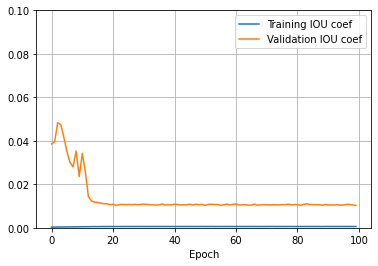

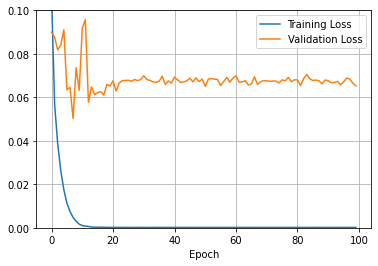

In [20]:
# Show a training report
training_info = pd.read_csv('./Logs/{}_log.csv'.format(MODEL_NAME), header=0)

acc1, = plt.plot(training_info['epoch'], training_info['iou_coef'])
acc2, = plt.plot(training_info['epoch'], training_info['val_iou_coef'])
plt.legend([acc1, acc2], ['Training IOU coef', 'Validation IOU coef'])
plt.xlabel('Epoch')
plt.ylim(0,0.1)
plt.grid(True)
plt.show()

loss1, = plt.plot(training_info['epoch'], training_info['loss'])
loss2, = plt.plot(training_info['epoch'], training_info['val_loss'])
plt.legend([acc1, acc2], ['Training Loss', 'Validation Loss'])                            
plt.xlabel('Epoch')
plt.ylim(0,0.1)
plt.grid(True)

plt.show()

## Model Evaluation

In [14]:
# Kaggle scores on validation images (mean score per image and overall mean score)
model = load_model("./Models/{}_model.h5".format(MODEL_NAME), custom_objects={'dice_coef_loss': dice_coef_loss, 'iou_coef': iou_coef})
y_pred = model.predict(validation_image, batch_size=4, verbose=1)
scores = util.validate_kaggle_score(validation_label, y_pred)
print(scores)
print(sum(scores)/len(scores))

252/252 [==============================] - 7s 29ms/step
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00823045267489712, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.

In [15]:
model = load_model("./Models/{}_model.h5".format(MODEL_NAME), custom_objects={'dice_coef_loss': dice_coef_loss, 'iou_coef': iou_coef})
#model.evaluate(test_images, test_label)
predictions = model.predict(test_image, batch_size=4, verbose=1)

94/94 [==============================] - 3s 29ms/step


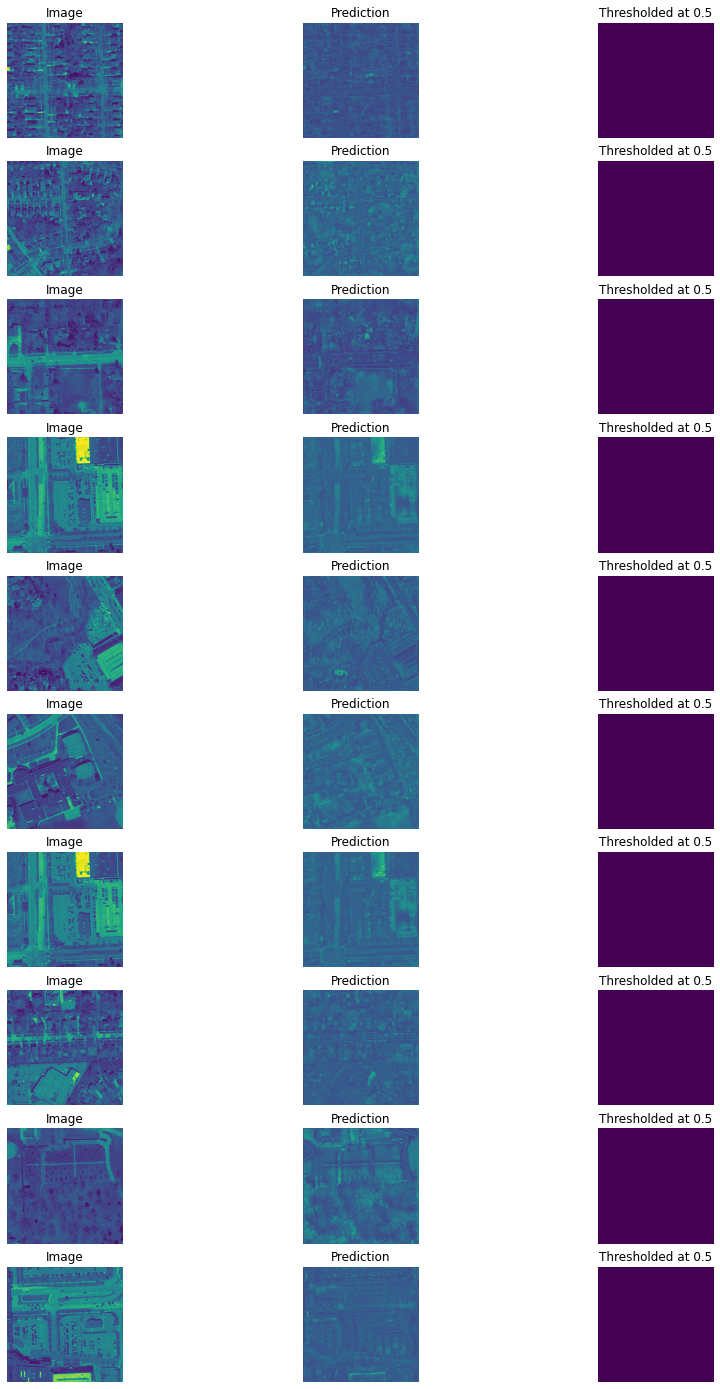

In [16]:
thresh_val = 0.5
predicton_threshold = (predictions > thresh_val).astype(np.uint8)

index = random.randint(0, len(predictions)-1)
num_samples = 10

f = plt.figure(figsize = (15, 25))
for i in range(1, num_samples*3, 3):
  index = random.randint(0, len(predictions)-1)

  f.add_subplot(num_samples, 3, i)
  plt.imshow(test_image[index][:,:,0])
  plt.title("Image")
  plt.axis('off')

  f.add_subplot(num_samples, 3, i+1)
  plt.imshow(np.squeeze(predictions[index][:,:,0]))
  plt.title("Prediction")
  plt.axis('off')

  f.add_subplot(num_samples, 3, i+2)
  plt.imshow(np.squeeze(predicton_threshold[index][:,:,0]))
  plt.title("Thresholded at {}".format(thresh_val))
  plt.axis('off')

plt.show()

## Create Submission File
Multiply image by 255 and convert to unit8 before storing s.t. it gets read out correctly by mask_to_submission!

In [17]:
predictions = np.squeeze(predictions*255)
predictions = predictions.astype(np.uint8)
result_dir = './Results/Prediction_Images/{}/'.format(MODEL_NAME)
os.makedirs(result_dir, exist_ok=True)

#print(predictions.shape)
#[print(predictions[i].shape) for i in range(n_test)]

[imageio.imwrite(result_dir + files_test[i], predictions[i],) for i in range(n_test)]
files_predictions = os.listdir(result_dir)
files_predictions = [result_dir + files_predictions[i] for i in range(n_test)]
masks_to_submission('./Results/Submissions/{}.csv'.format(MODEL_NAME), *files_predictions)
print('Submission ready')

./Results/Prediction_Images/fullyCNN_datagenerator/test_211.png
./Results/Prediction_Images/fullyCNN_datagenerator/test_49.png
./Results/Prediction_Images/fullyCNN_datagenerator/test_10.png
./Results/Prediction_Images/fullyCNN_datagenerator/test_136.png
./Results/Prediction_Images/fullyCNN_datagenerator/test_92.png
./Results/Prediction_Images/fullyCNN_datagenerator/test_177.png
./Results/Prediction_Images/fullyCNN_datagenerator/test_76.png
./Results/Prediction_Images/fullyCNN_datagenerator/test_64.png
./Results/Prediction_Images/fullyCNN_datagenerator/test_23.png
./Results/Prediction_Images/fullyCNN_datagenerator/test_80.png
./Results/Prediction_Images/fullyCNN_datagenerator/test_51.png
./Results/Prediction_Images/fullyCNN_datagenerator/test_9.png
./Results/Prediction_Images/fullyCNN_datagenerator/test_14.png
./Results/Prediction_Images/fullyCNN_datagenerator/test_108.png
./Results/Prediction_Images/fullyCNN_datagenerator/test_139.png
./Results/Prediction_Images/fullyCNN_datagenerator/